#Bayesian Decision Theory :
  
  Bayesian Decision theory is a decision theory  which is informed by Bayesian probability. In this problem we classify MNIST digit into 10 different digits using Bayesian decision theory.
For this problem we used Quadratic discriminant function.  

ref: https://wiki.lesswrong.com/wiki/Bayesian_decision_theory


In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

Data set is loaded from keras dataset. The dataset is normalized by dividing it by 255. The images are 28 x 28 pixels in gray-scale. The categories are 0, 1, ... 9. We concatenate the image rows into a 28 x 28 vector and treat this as our feature, and assume the feature vectors in each category in the training data have Gaussian distribution. 

In [3]:
#load the data set and normalize it
df=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=df.load_data()
x_train=x_train/255
x_test=x_test/255

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
#check the shape 
x_train.shape
y_train.shape

(60000,)

The dataset is grouped with respect to their labels.

In [0]:
# club images with respect to their labels

data_set={}  #directory for each class
number_output_class=10

for i in range(number_output_class):
  data_set[i]=[]

#group the x_train with respect to y_train labels
for i in range(y_train.shape[0]):
  data_set[y_train[i]].append(x_train[i,:,:])

The probability of class is p(omega)= (total dataset in a class)/ (total dataset)

In [0]:
#probability of classes:
prob={}
for i in range(number_output_class):
  prob[i]=len(data_set[i])/x_train.shape[0]
   

The mean and standard deviation of the features for the 10 categories is given as follows.

mean:
$\mu_{i}= x_{i}/N$

Standard Deviation:
$\sigma_{i}=\sqrt(\frac{\sum{(x_{i}-\mu)^{2}}}{N})$


In [0]:
#find the mean and standard deviation
final_mean={}
image_dimension=data_set[0][1].shape   # to get the dimension of the image within the clustered data.
for i in data_set:
  mean_mat=np.zeros(image_dimension)  # 28x28 matrix
  for j in data_set[i]:
    mean_mat=mean_mat+j
  mean_mat=mean_mat/len(data_set[i]) 
  final_mean[i]=mean_mat



#standard deviation
final_standard_dev={}

for i in data_set:
     standard_dev=np.zeros(image_dimension)
     for j in data_set[i]:
         standard_dev +=(j-final_mean[i])**2
     standard_dev=standard_dev/len(data_set[i])
     final_standard_dev[i]=standard_dev 



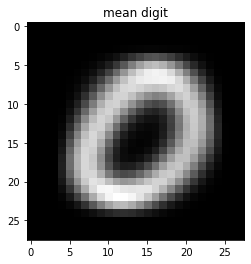

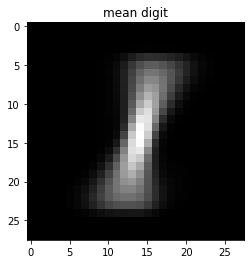

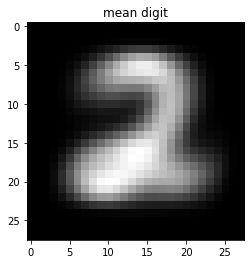

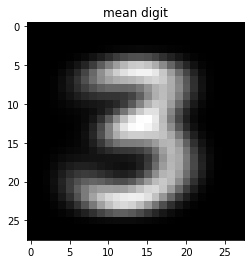

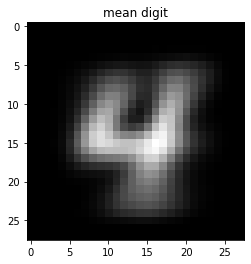

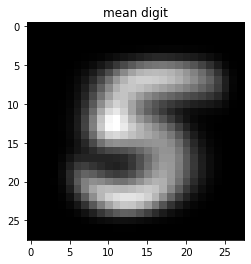

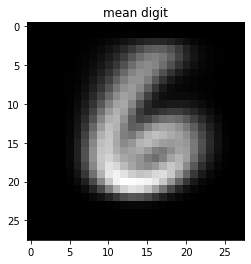

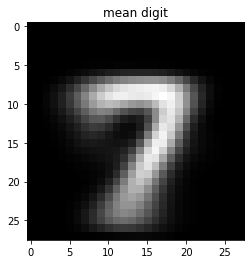

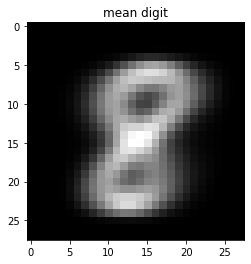

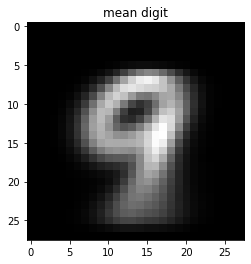

In [12]:
#plot mean
for i in range(len(data_set)):
        plt.clf()
       # f, axarr = plt.subplots(1, 2)
        #axarr[0].imshow(final_mean[i], cmap="gray")
        #axarr[0].set_title('Mean Digit')
        plt.imshow(final_mean[i],cmap="gray")
        plt.title("mean digit")
        plt.show()


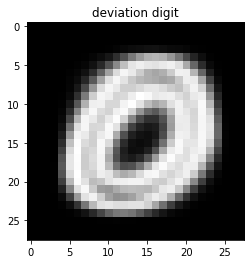

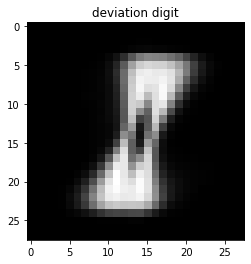

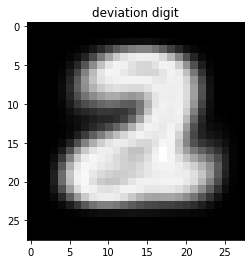

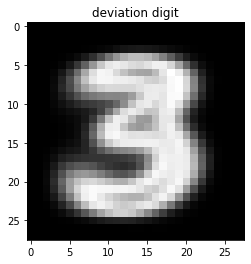

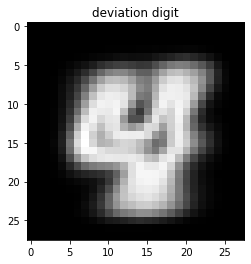

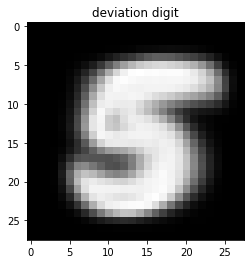

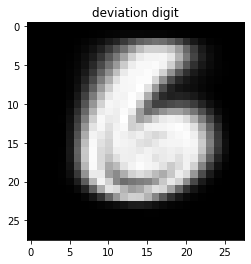

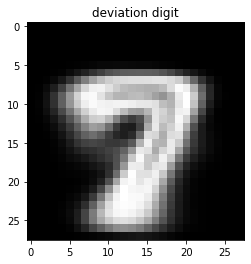

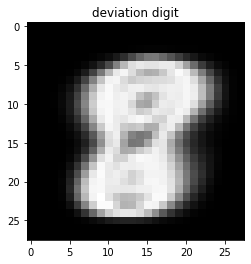

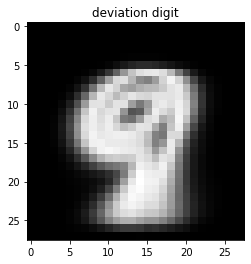

In [14]:
#plot standard deviation
for i in range(len(data_set)):
        plt.clf()
    
        plt.imshow(final_standard_dev[i],cmap="gray")
        plt.title("deviation digit")
        plt.show()

## Training
Using 0-1 loss function and bayesian decision rules accuracy can be found.
The equation used is quadratic dicriminant function:
$g_{i}(x)=x^{T}W[i]x+N_{i}^{T}x+B_{i0}$
where 

$W_{i}=\frac{−1}{2}∑_{i}^{-1}$

$N_{i}=∑_{i}^{-1} μ_{i}$

$B_{i0}=\frac{-1}{2}μ_{i}^{t} \sum_{i}^{−1}μ_{i}+lnP(ω_{i})−\frac{1}{2}ln|\sum_{i}|$ 


the equation uses  training dataset to calculate  W, N ,B.
Once the unknown variables are calculated we get the equation g.(quadratic discriminant function) which is our trained model.


In [0]:

#creating the  diagonal covariance matrix
for i in range(number_output_class):
   final_standard_dev[i]=final_standard_dev[i].flatten()
   cov_mat=np.zeros((len(final_standard_dev[i]),len(final_standard_dev[i])))
   for j in range(len(final_standard_dev[i])):
      cov_mat[j][j]=(final_standard_dev[i][j]**2)+ 0.2  # small error 
  

In [0]:
# find  wi =0.5*inv(cov_mat)
W={}
for i in range(number_output_class):
  W[i]=-0.5*np.linalg.inv(cov_mat)
         


In [0]:
#find Ni = inv(cov_mati)*meani
N={}
 
for i in range(number_output_class):
  final_mean[i]=final_mean[i].flatten()
  N[i]=np.matmul(np.linalg.inv(cov_mat),final_mean[i]) 


In [0]:
#find Bi 
b={}
for i in range (number_output_class):
  b[i]=-0.5*(np.matmul(np.transpose(final_mean[i]),N[i])) +np.log(prob[i])


## Prediction:
Prediction is calculated by using test data set. The test set is applied to the trained model where $g_{i}(x)$  is found.
According to 0-1 error function when $g_{i}(x)$ is maximum then the risk is minimum.
Therefore, discriminant function that gives the highest values is considered.

For prediction the maximum  values of $g_{i}(x)$ is compared with the labels of the test data set.


Accuracy is found as:

Accuracy = correct_value/length of test case.

In [0]:
#predict test case

max=[]
accuracy=0

for x in(x_test):
       g=[]
       B={}
       A={}
       C={}
       x=x.flatten()
    # x=x.reshape(784,1)
       for i in range(number_output_class):
           A[i]=np.matmul(np.matmul(np.transpose(x),W[i]),x)
           B[i] =np.matmul(np.transpose(N[i]),x)
           C[i]=b[i]
           g.append(A[i]+B[i]+C[i])
       g=np.asarray(g) 
       max.append(np.argmax(g)) 
      #print(max)

   
        





In [26]:
for i in range(len(max)):
    if max[i] ==y_test[i]:
        accuracy+=1

print("accuracy",accuracy/len(x_test) )  

accuracy 0.8187



# Conclusion
The Accuracy was found to be 81% .
As guassian assumptions are considered, for example weight is not being updated in the discriminant analysis, hence it is difficult to improve the accuracy.

ref:https://www.researchgate.net/figure/OVERVIEW-OF-PROS-AND-CONS-OF-KNN-LDA-AND-QDA_tbl1_224375624